In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
global RED
global GREEN
global YELLOW
global WHITE
global BLACK

RED = 2
GREEN = 1
YELLOW = 0
WHITE = 3
BLACK = 4

In [3]:
# define matrix
def getMainMatrix(image_1, image_2):
    
    # define the main matrix with the required size
    mainMatrix = np.zeros((len(image_1) + 1, len(image_2) + 1))
    
    # declare the matchscore, gapscore, and mismatchscore
    matchScore = 1
    gapScore = -2
    mismatchScore = -1
    
    # fix the first element of the matrix as 0
    mainMatrix[0][0] = 0
    
    for i in range(len(image_1) + 1):
        for j in range(len(image_2) + 1):
            
            # fill the first row of the matrix by adding the gapscores
            if i == 0:
                mainMatrix[i][j] = gapScore*j
                
            # fill the second row of the matrix by adding the gapscores
            elif j == 0:
                mainMatrix[i][j] = gapScore*i
                
            # fill the remaining elements of the matrix with either the matchscore or the mismatch score
            else:
                elements = []
                elements.append(mainMatrix[i - 1][j] + gapScore)
                elements.append(mainMatrix[i][j - 1] + gapScore)
                
                # add matchscore if the elements are same
                if(image_1[i - 1] == image_2[j - 1]):
                    elements.append(mainMatrix[i - 1][j - 1] + matchScore)
                    
                # add mismatchscore if the elements are different
                else:
                    elements.append(mainMatrix[i - 1][j - 1] + mismatchScore)
                mainMatrix[i][j] = max(elements)
    
    return mainMatrix

In [4]:
# needlemanwunsch algorithm
def needlemanWunsch(image_1, image_2):
    
    string1 = ""
    string2 = ""

    i = len(image_1)
    j = len(image_2)
    same = 0
    
#     print("Length of query vector:", i)
#     print("Length of reference vector:", j)
    
    # obtain the main matrix for sequence 1 and sequence 2
    mainMatrix = getMainMatrix(image_1, image_2)
#     print(mainMatrix)
    
    # declare empty arrays for storing insertions, deletions, and substitutions
    insertions = []
    deletions = []
    substitutions = []
    array = []

    while (i > 0 and j > 0):
        
        # when the elements of both the sequences are equal the elements are added to the strings 
        if(image_1[i - 1] == image_2[j - 1]):
            string1 = str(image_1[i - 1]) + string1
            string2 = str(image_2[j - 1]) + string2
            array.append([i - 1, j - 1])
            i = i - 1
            j = j - 1
            same = same + 1

        else:
            # surrounding elements are added to the array
            elements = []
            elements.append(mainMatrix[i - 1][j])
            elements.append(mainMatrix[i][j - 1])       
            elements.append(mainMatrix[i - 1][j - 1])
            
            # maximum element is identified
            final = max(elements)
            
            # index of the maximum element is identified
            index = elements.index(final)
            
            # check the index value and append the i and j values to the corresponding arrays
            if (index == 0):
                insertions.append(i - 1)
                i = i - 1
                string1 = "-" + string1
            elif (index == 1):
                deletions.append(j - 1)
                j = j - 1
                string2 = "-" + string2
            else:
                substitutions.append(j - 1)
                i = i - 1
                j = j - 1
                string1 = "*" + string1
                
    return same, array

In [5]:
def getColorCoding(image):
    image_array = []
    for i in image:
        for j in i:
            red = j[2]
            green = j[1]
            blue = j[0]
#             print(j)
            yellowArray = [0, 200, 200]
            greenArray = [0, 255, 0]
            redArray = [0, 0, 255]
            
            if all(temp >= 210 for temp in j):
                image_array.append(4)
            elif all(temp <= 10 for temp in j):
                image_array.append(3)
            elif np.allclose(yellowArray, j, 1.3, 0.001):
                image_array.append(0)
            elif green == 255 and red == 0 and blue == 0:
                image_array.append(1)
            elif np.allclose(greenArray, j, 2.5, 0.001):
                image_array.append(1)
            elif np.allclose(redArray, j, 1.5, 0.001):
                image_array.append(2)
            else:
                image_array.append(9)
            
    return image_array

In [6]:
def getPixel(number, x, y):
    if number % y == 0:
        row = number // y
        col = y
    else:
        row = (number // y) + 1
        col = number % y
    return (row, col)

In [7]:
def getOutline(resized_img, elements):
    x, y, z = resized_img.shape
    end = elements[0][0]
    start = elements[-1][0]
    
    if start < y:
        start_point = (0, start)
    else:
        start_point = (start // y, start % y)
    if end < y:
        end_point = (0, end)
    else:
        end_point = (end // y, end % y)

#     start_point = getPixel(start, x, y)
#     end_point = getPixel(end, x, y)
    
    print(start_point)
    print(end_point)

    color = (255, 255, 255)
    image = cv2.rectangle(resized_img, start_point, end_point, color, 2)
    return image

In [8]:
def checkColor(image):
    scale_percent = 12.5
    width = int(image.shape[1] * scale_percent / 100)
    height = int(image.shape[0] * scale_percent / 100)
    dim = (width, height)
    
    print(dim)
    
    green = cv2.imread(r"./Green_Color.png")
    resized_green = cv2.resize(green, dim, interpolation = cv2.INTER_AREA)
    greenCode = getColorCoding(resized_green)
    
    print("Green Code obtained")
    
    red = cv2.imread(r"./Red_Color.png")
    resized_red = cv2.resize(red, dim, interpolation = cv2.INTER_AREA)
    redCode = getColorCoding(resized_red)
    
    print("Red Code obtained")
    
    yellow = cv2.imread(r"./Yellow_Color.png")
    resized_yellow = cv2.resize(yellow, dim, interpolation = cv2.INTER_AREA)
    yellowCode = getColorCoding(resized_yellow)
    
    print("Yellow Code obtained")
    
    resized_img = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
    imgCode = getColorCoding(resized_img)
    
    print("Image Code obtained")
    
    greenScore, greenArray = needlemanWunsch(imgCode, greenCode)
    redScore, redArray = needlemanWunsch(imgCode, redCode)
    yellowScore, yellowArray = needlemanWunsch(imgCode, yellowCode)
    
    array = []
    array.append(greenScore)
    array.append(redScore)
    array.append(yellowScore)
    
#     print(array)
    
    maxScore = max(array)
    maxIndex = array.index(maxScore)
    
    if maxIndex == 0:
        return "Green", greenArray, resized_img
    elif maxIndex == 1:
        return "Red", redArray, resized_img
    else:
        return "Yellow", yellowArray, resized_img

In [9]:
def getColor(image):
    image = cv2.imread(image)
    name, elements, resized_img = checkColor(image)
    print("Color:", name)
    image_new = getOutline(resized_img, elements)
    return name, image_new

In [10]:
import  tkinter as tk
from tkinter import filedialog

root = tk.Tk()
root.withdraw()
file_path = filedialog.askopenfilename()
color, image = getColor(file_path)

(12, 37)
Green Code obtained
Red Code obtained
Yellow Code obtained
Image Code obtained
Color: Yellow
(0, 0)
(27, 0)


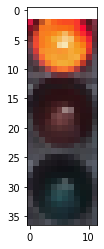

In [11]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

pixels = np.array(image)

plt.imshow(pixels)
plt.show()